In [5]:
import glob
import cv2
from skimage.feature import hog
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pickle

In [6]:
car_imgs = glob.glob('../vehicles/**/*.png')
noncar_imgs = glob.glob('../non-vehicles/**/*.png')
print('number of cars images = {}'.format(len(car_imgs)))
print('number of not cars images = {}'.format(len(noncar_imgs)))

number of cars images = 8792
number of not cars images = 8968


In [7]:
#apply hog transform
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), block_norm= 'L2-Hys',
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), block_norm= 'L2-Hys',
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

D:\Programmmi\Anaconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:144: RuntimeWarning: invalid value encountered in sqrt
  image = np.sqrt(image)
D:\Programmmi\Anaconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:190: RuntimeWarning: invalid value encountered in remainder
  orientations, orientation_histogram)
D:\Programmmi\Anaconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:17: RuntimeWarning: invalid value encountered in minimum
  out = np.minimum(out, 0.2)


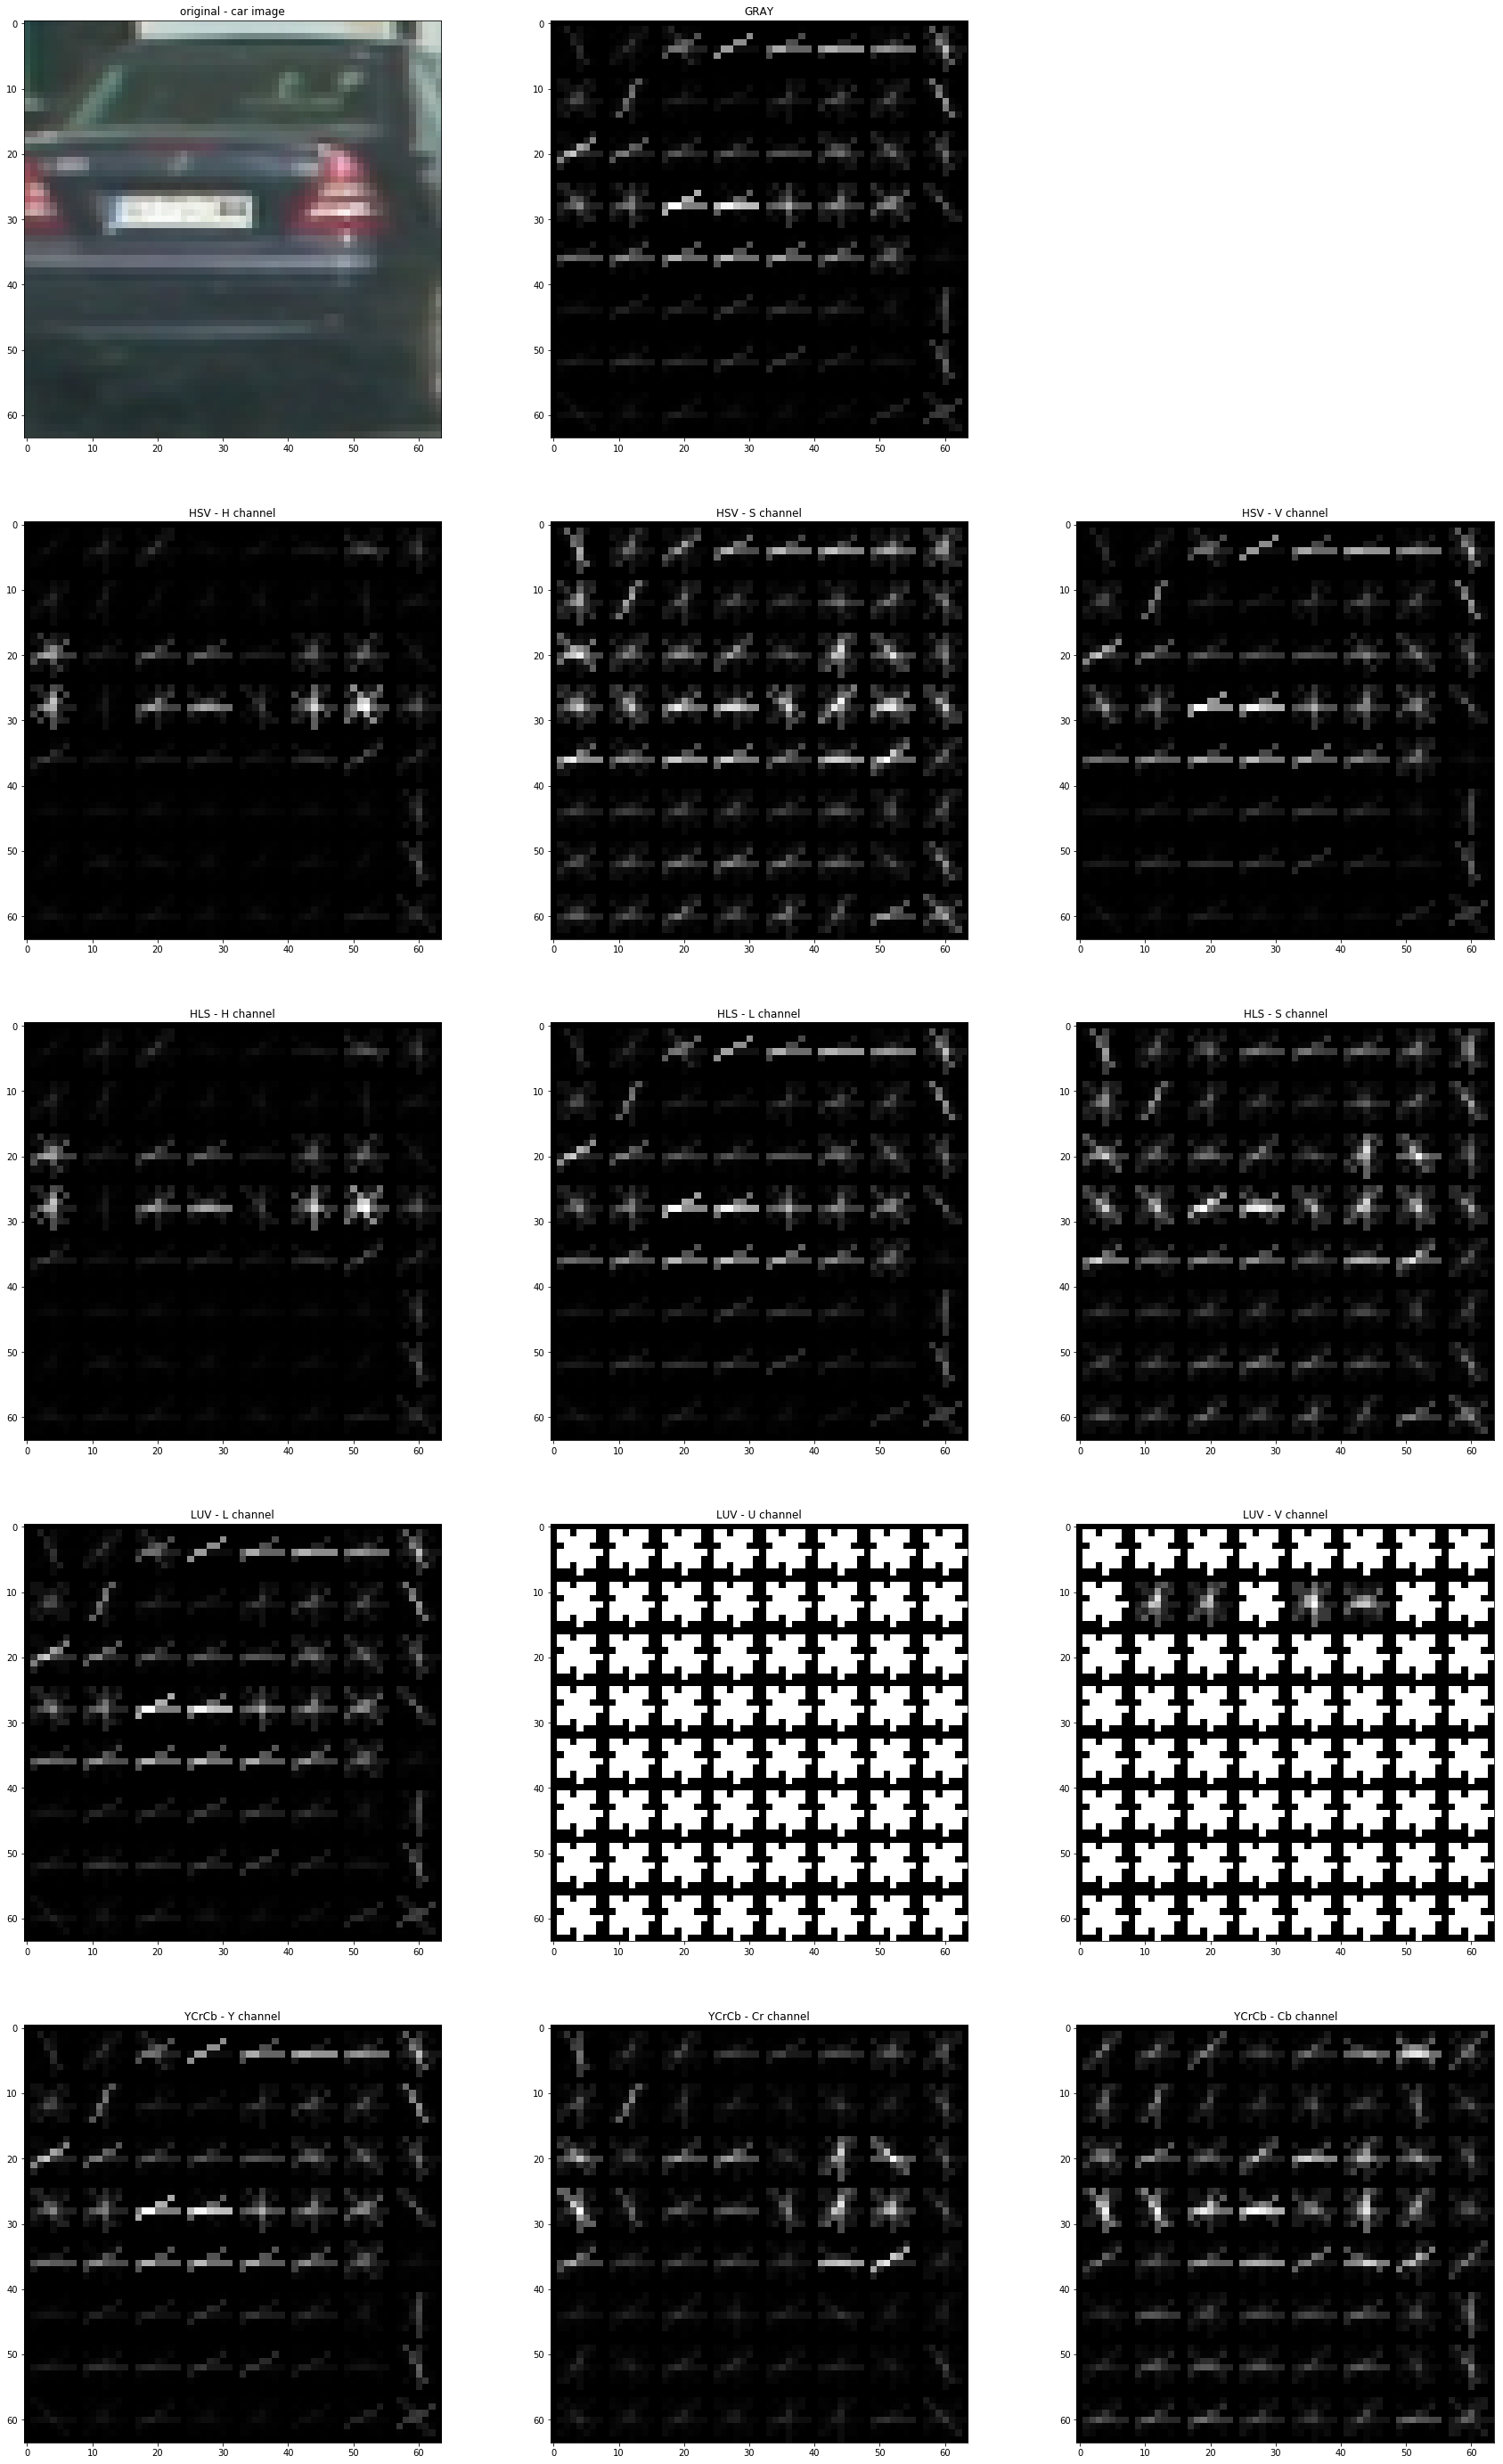

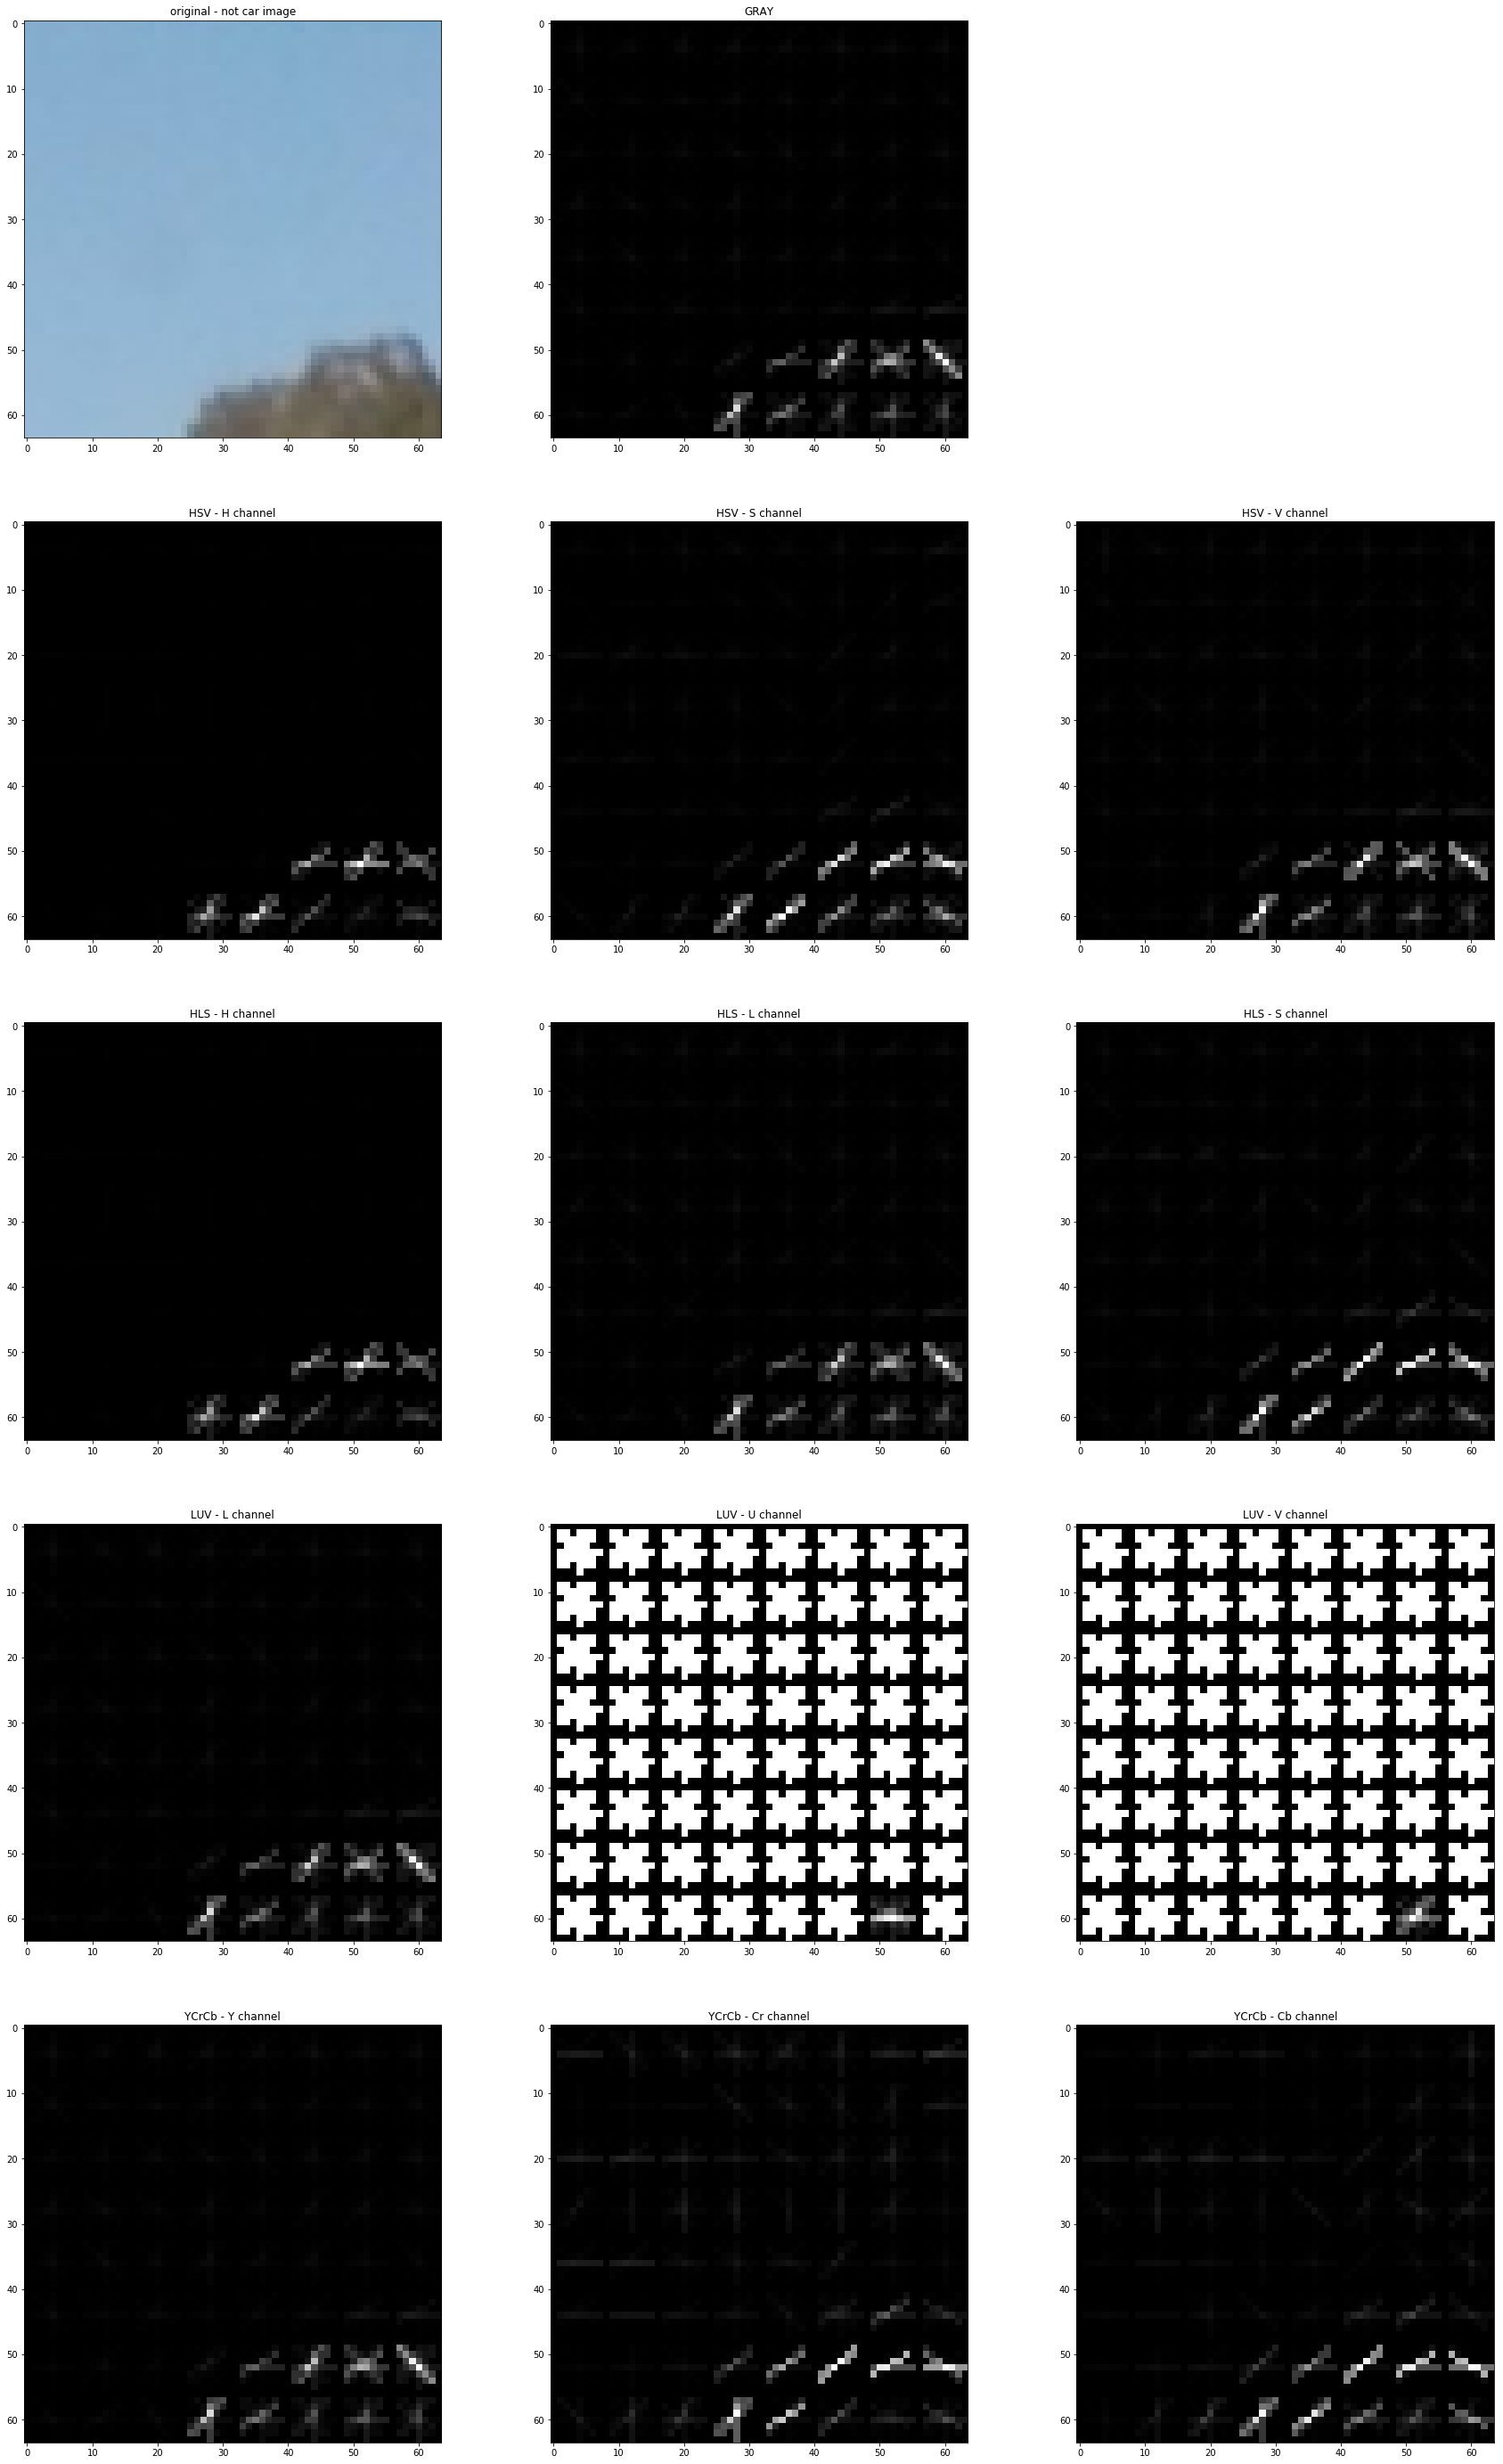

In [13]:
#example of hog transform
orient = 8
pix_per_cell = 8
cell_per_block = 2
car_img_example=mpimg.imread(car_imgs[1000])
car_img_example_gray=cv2.cvtColor(car_img_example,cv2.COLOR_RGB2GRAY)
car_img_example_hsv=cv2.cvtColor(car_img_example,cv2.COLOR_RGB2HSV)
car_img_example_hls=cv2.cvtColor(car_img_example,cv2.COLOR_RGB2HLS)
car_img_example_luv=cv2.cvtColor(car_img_example,cv2.COLOR_RGB2LUV)
car_img_example_ycrcb=cv2.cvtColor(car_img_example,cv2.COLOR_RGB2YCrCb)
noncar_img_example=mpimg.imread(noncar_imgs[1000])
noncar_img_example_gray=cv2.cvtColor(noncar_img_example,cv2.COLOR_RGB2GRAY)
noncar_img_example_hsv=cv2.cvtColor(noncar_img_example,cv2.COLOR_RGB2HSV)
noncar_img_example_hls=cv2.cvtColor(noncar_img_example,cv2.COLOR_RGB2HLS)
noncar_img_example_luv=cv2.cvtColor(noncar_img_example,cv2.COLOR_RGB2LUV)
noncar_img_example_ycrcb=cv2.cvtColor(noncar_img_example,cv2.COLOR_RGB2YCrCb)
_, car_hog_img_gray = get_hog_features(car_img_example_gray, orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_hsv_h = get_hog_features(car_img_example_hsv[:,:,0], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_hsv_s = get_hog_features(car_img_example_hsv[:,:,1], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_hsv_v = get_hog_features(car_img_example_hsv[:,:,2], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_hls_h = get_hog_features(car_img_example_hls[:,:,0], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_hls_l = get_hog_features(car_img_example_hls[:,:,1], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_hls_s = get_hog_features(car_img_example_hls[:,:,2], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_luv_l = get_hog_features(car_img_example_luv[:,:,0], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_luv_u = get_hog_features(car_img_example_luv[:,:,1], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_luv_v = get_hog_features(car_img_example_luv[:,:,2], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_ycrcb_y = get_hog_features(car_img_example_ycrcb[:,:,0], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_ycrcb_cr = get_hog_features(car_img_example_ycrcb[:,:,1], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_ycrcb_cb = get_hog_features(car_img_example_ycrcb[:,:,2], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
#
_, noncar_hog_img_gray = get_hog_features(noncar_img_example_gray, orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_hsv_h = get_hog_features(noncar_img_example_hsv[:,:,0], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_hsv_s = get_hog_features(noncar_img_example_hsv[:,:,1], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_hsv_v = get_hog_features(noncar_img_example_hsv[:,:,2], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_hls_h = get_hog_features(noncar_img_example_hls[:,:,0], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_hls_l = get_hog_features(noncar_img_example_hls[:,:,1], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_hls_s = get_hog_features(noncar_img_example_hls[:,:,2], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_luv_l = get_hog_features(noncar_img_example_luv[:,:,0], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_luv_u = get_hog_features(noncar_img_example_luv[:,:,1], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_luv_v = get_hog_features(noncar_img_example_luv[:,:,2], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_ycrcb_y = get_hog_features(noncar_img_example_ycrcb[:,:,0], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_ycrcb_cr = get_hog_features(noncar_img_example_ycrcb[:,:,1], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_ycrcb_cb = get_hog_features(noncar_img_example_ycrcb[:,:,2], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
plt.figure(figsize=(30,50))
i=1
plt.subplot(5,3,i)
i+=1
plt.imshow(car_img_example)
plt.title('original - car image')
plt.subplot(5,3,i)
i+=2
plt.imshow(car_hog_img_gray,cmap='Greys_r')
plt.title('GRAY')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_hsv_h,cmap='Greys_r')
plt.title('HSV - H channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_hsv_s,cmap='Greys_r')
plt.title('HSV - S channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_hsv_v,cmap='Greys_r')
plt.title('HSV - V channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_hls_h,cmap='Greys_r')
plt.title('HLS - H channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_hls_l,cmap='Greys_r')
plt.title('HLS - L channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_hls_s,cmap='Greys_r')
plt.title('HLS - S channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_luv_l,cmap='Greys_r')
plt.title('LUV - L channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_luv_u,cmap='Greys_r')
plt.title('LUV - U channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_luv_v,cmap='Greys_r')
plt.title('LUV - V channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_ycrcb_y,cmap='Greys_r')
plt.title('YCrCb - Y channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_ycrcb_cr,cmap='Greys_r')
plt.title('YCrCb - Cr channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_ycrcb_cb,cmap='Greys_r')
plt.title('YCrCb - Cb channel')
#
plt.figure(figsize=(30,50))
i=1
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_img_example)
plt.title('original - not car image')
plt.subplot(5,3,i)
i+=2
plt.imshow(noncar_hog_img_gray,cmap='Greys_r')
plt.title('GRAY')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_hsv_h,cmap='Greys_r')
plt.title('HSV - H channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_hsv_s,cmap='Greys_r')
plt.title('HSV - S channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_hsv_v,cmap='Greys_r')
plt.title('HSV - V channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_hls_h,cmap='Greys_r')
plt.title('HLS - H channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_hls_l,cmap='Greys_r')
plt.title('HLS - L channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_hls_s,cmap='Greys_r')
plt.title('HLS - S channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_luv_l,cmap='Greys_r')
plt.title('LUV - L channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_luv_u,cmap='Greys_r')
plt.title('LUV - U channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_luv_v,cmap='Greys_r')
plt.title('LUV - V channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_ycrcb_y,cmap='Greys_r')
plt.title('YCrCb - Y channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_ycrcb_cr,cmap='Greys_r')
plt.title('YCrCb - Cr channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_ycrcb_cb,cmap='Greys_r')
plt.title('YCrCb - Cb channel')

In [8]:
#hog transform to a set of images
def extract_features(imgs, cspace='RGB', orient=8, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)
        elif hog_channel == 'GRAY':
            gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            hog_features = get_hog_features(gray_image, orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            
        # Append the new feature vector to the features list
        features.append(hog_features)

    # Return list of feature vectors
    return features

In [9]:
# process data
colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 8
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"

t=time.time()
car_features = extract_features(car_imgs, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
notcar_features = extract_features(noncar_imgs, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG features...')

# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)

n_cf = len(car_features)
n_ncf = len(notcar_features)

#clean-up memory
car_features = []
notcar_features = []

# Define the labels vector
y = np.hstack((np.ones(n_cf), np.zeros(n_ncf)))

# Split up data into randomized training and test sets
np.random.seed(0)
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rand_state)

#memory clean-up
X=0
y=0
    
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

pickle_file_name = "train_test_data_{}.p".format(colorspace)

pickle.dump( X_train, open( pickle_file_name, "wb" ) )
pickle.dump( X_test, open( pickle_file_name, "wb" ) )
pickle.dump( y_train, open( pickle_file_name, "wb" ) )
pickle.dump( y_test, open( pickle_file_name, "wb" ) )

251.25 Seconds to extract HOG features...
Using: 8 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 4704


In [10]:
#train and test
pickle.load( open( pickle_file_name, "rb" ))

# Use a non linear SVC 
svc = SVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')
print('About', round((t2-t)/n_predict, 5), 'Seconds per label')

298.41 Seconds to train SVC...
Test Accuracy of SVC =  0.9837
My SVC predicts:  [ 1.  1.  0.  1.  0.  1.  1.  1.  0.  0.]
For these 10 labels:  [ 1.  1.  0.  1.  0.  1.  1.  1.  0.  0.]
0.265 Seconds to predict 10 labels with SVC
About 0.0265 Seconds per label


In [11]:
pickle.dump( svc, open( 'classifier.p', "wb" ) )

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Use a Gradient Boosting Classifier 
gbc = GradientBoostingClassifier()
# Check the training time for the Gradient Boosting Classifier
t=time.time()
gbc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train Gradient Boosting Classifier...')
# Check the score of the Gradient Boosting Classifier
print('Test Accuracy of Gradient Boosting Decision Tree = ', round(gbc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My Gradient Boosting Classifier predicts: ', gbc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with Gradient Boosting Classifier')
print('About', round((t2-t)/n_predict, 5), 'Seconds per label')
pickle.dump( gbc, open( 'classifier.p', "wb" ) )